### Central Limit Theorem   

Answer all **Questions**

References:  
- Wikipedia, https://en.wikipedia.org/wiki/Computational_statistics  
- Raju Varshney, https://www.geeksforgeeks.org/permutation-and-combination-in-python/    
- Wikipedia, https://en.wikipedia.org/wiki/Central_limit_theorem    
- Outlier AI, https://towardsdatascience.com/how-to-think-about-combinatorics-like-a-data-scientist-bddbd18eff80     
- Computational Statistics in Python, Duke University,  
https://people.duke.edu/~ccc14/sta-663/ResamplingAndMonteCarloSimulations.html  
- What is a Confidence Interval?
Source: https://stattrek.com/estimation/confidence-interval.aspx 
        

### Sampling with and without replacement    


`np.random.choice(a, size=None, replace=True, p=None)`

Generates a random sample from a given 1-D array


In [6]:
import numpy as np
?np.random.choice

In [17]:
# Sampling is done with replacement by default
np.random.choice(4, 12)

array([0, 1, 0, 0, 3, 0, 1, 3, 0, 3, 1, 0])

In [18]:
# Probability weights can be given
np.random.choice(4, 12, p=[.4, .1, .1, .4])

array([3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3], dtype=int64)

In [46]:
x = np.random.randint(0, 10, (8, 12))
x

array([[6, 2, 9, 0, 1, 1, 6, 7, 1, 7, 5, 8],
       [1, 3, 4, 7, 7, 3, 5, 9, 7, 9, 0, 2],
       [3, 0, 6, 9, 5, 5, 4, 0, 3, 6, 8, 8],
       [9, 4, 1, 9, 4, 8, 0, 2, 2, 2, 0, 5],
       [6, 1, 8, 8, 0, 1, 2, 7, 4, 9, 5, 4],
       [2, 5, 5, 5, 1, 2, 5, 0, 5, 3, 3, 7],
       [9, 0, 4, 2, 9, 8, 7, 9, 6, 9, 3, 5],
       [2, 3, 4, 8, 6, 5, 3, 0, 0, 7, 8, 2]])

`np.ravel(a, order='C')`

Returns a contiguous flattened array.

A 1-D array, containing the elements of the input, is returned.  A copy is
made only if needed.


In [50]:
np.ravel?

In [58]:
# sampling individual elements
np.random.choice(np.ravel(x), 12)

array([8, 9, 2, 6, 3, 7, 6, 8, 5, 4, 5, 0])

In [59]:
# sampling rows
print(x.shape)
idx = np.random.choice(x.shape[0], 4) # sample 4 of 8 choices/rows randomly
x[idx, :]

(8, 12)


array([[6, 1, 8, 8, 0, 1, 2, 7, 4, 9, 5, 4],
       [6, 2, 9, 0, 1, 1, 6, 7, 1, 7, 5, 8],
       [1, 3, 4, 7, 7, 3, 5, 9, 7, 9, 0, 2],
       [6, 2, 9, 0, 1, 1, 6, 7, 1, 7, 5, 8]])

In [81]:
# sampling columns
print(x.shape)
print(x)
idx = np.random.choice(x.shape[1], 4)
print(idx)
x[:, idx]

(8, 12)
[[6 2 9 0 1 1 6 7 1 7 5 8]
 [1 3 4 7 7 3 5 9 7 9 0 2]
 [3 0 6 9 5 5 4 0 3 6 8 8]
 [9 4 1 9 4 8 0 2 2 2 0 5]
 [6 1 8 8 0 1 2 7 4 9 5 4]
 [2 5 5 5 1 2 5 0 5 3 3 7]
 [9 0 4 2 9 8 7 9 6 9 3 5]
 [2 3 4 8 6 5 3 0 0 7 8 2]]
[5 2 3 5]


array([[1, 9, 0, 1],
       [3, 4, 7, 3],
       [5, 6, 9, 5],
       [8, 1, 9, 8],
       [1, 8, 8, 1],
       [2, 5, 5, 2],
       [8, 4, 2, 8],
       [5, 4, 8, 5]])

In [86]:
# Give the argument replace=False

# Note: this will throw an error. Cannot take a larger sample than population when 'replace=False'
try:
    print(np.random.choice(4, 12, replace=False))
except ValueError as e:
    print(e)

Cannot take a larger sample than population when 'replace=False'


In [87]:
x

array([[6, 2, 9, 0, 1, 1, 6, 7, 1, 7, 5, 8],
       [1, 3, 4, 7, 7, 3, 5, 9, 7, 9, 0, 2],
       [3, 0, 6, 9, 5, 5, 4, 0, 3, 6, 8, 8],
       [9, 4, 1, 9, 4, 8, 0, 2, 2, 2, 0, 5],
       [6, 1, 8, 8, 0, 1, 2, 7, 4, 9, 5, 4],
       [2, 5, 5, 5, 1, 2, 5, 0, 5, 3, 3, 7],
       [9, 0, 4, 2, 9, 8, 7, 9, 6, 9, 3, 5],
       [2, 3, 4, 8, 6, 5, 3, 0, 0, 7, 8, 2]])

`np.random.shuffle()` or `np.random.permutation()` can be used to generate a random permutation.

`np.random.shuffle()` occurs in place. `np.random.permutation()` does the same thing but returns a copy.

In [88]:
# Shuffling occurs "in place" for efficiency
np.random.shuffle(x)
x

array([[1, 3, 4, 7, 7, 3, 5, 9, 7, 9, 0, 2],
       [6, 1, 8, 8, 0, 1, 2, 7, 4, 9, 5, 4],
       [9, 4, 1, 9, 4, 8, 0, 2, 2, 2, 0, 5],
       [9, 0, 4, 2, 9, 8, 7, 9, 6, 9, 3, 5],
       [6, 2, 9, 0, 1, 1, 6, 7, 1, 7, 5, 8],
       [2, 3, 4, 8, 6, 5, 3, 0, 0, 7, 8, 2],
       [2, 5, 5, 5, 1, 2, 5, 0, 5, 3, 3, 7],
       [3, 0, 6, 9, 5, 5, 4, 0, 3, 6, 8, 8]])

In [89]:
# numpy.random.permutation does the same thing but returns a copy
np.random.permutation(x)

array([[2, 5, 5, 5, 1, 2, 5, 0, 5, 3, 3, 7],
       [9, 4, 1, 9, 4, 8, 0, 2, 2, 2, 0, 5],
       [2, 3, 4, 8, 6, 5, 3, 0, 0, 7, 8, 2],
       [6, 1, 8, 8, 0, 1, 2, 7, 4, 9, 5, 4],
       [3, 0, 6, 9, 5, 5, 4, 0, 3, 6, 8, 8],
       [6, 2, 9, 0, 1, 1, 6, 7, 1, 7, 5, 8],
       [1, 3, 4, 7, 7, 3, 5, 9, 7, 9, 0, 2],
       [9, 0, 4, 2, 9, 8, 7, 9, 6, 9, 3, 5]])

In [28]:
# When given an integre n, permutation treats it is as the array arange(n)
np.random.permutation(10)

array([3, 2, 9, 1, 5, 0, 6, 8, 4, 7])

In [29]:
# Use indices if you need to shuffle collections of arrays in synchrony
x = np.arange(12).reshape(4,3)
y = x + 10
idx = np.random.permutation(x.shape[0])
print(x[idx, :], '\n')
print(y[idx, :])

[[ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [ 0  1  2]] 

[[13 14 15]
 [16 17 18]
 [19 20 21]
 [10 11 12]]


In [104]:

np.set_printoptions(formatter={'float': lambda x: '%.3f' % x})
print(x)

[[1 3 4 7 7 3 5 9 7 9 0 2]
 [6 1 8 8 0 1 2 7 4 9 5 4]
 [9 4 1 9 4 8 0 2 2 2 0 5]
 [9 0 4 2 9 8 7 9 6 9 3 5]
 [6 2 9 0 1 1 6 7 1 7 5 8]
 [2 3 4 8 6 5 3 0 0 7 8 2]
 [2 5 5 5 1 2 5 0 5 3 3 7]
 [3 0 6 9 5 5 4 0 3 6 8 8]]


### Central Limit Theorem (CLT) 

> Given a dataset with an unknown distribution (it could be uniform, binomial or completely random), the sample means will approximate the normal distribution.

For example, suppose that a sample is obtained containing many observations, each observation being randomly generated in a way that does not depend on the values of the other observations, and that the arithmetic mean of the observed values is computed. If this procedure is performed many times, the central limit theorem says that the distribution of the average will be closely approximated by a normal distribution. 

A simple example of this is that if one flips a coin many times the probability of getting a given number of heads in a series of flips will approach a normal curve, with mean equal to half the total number of flips in each series. In the limit of an infinite number of flips, it will equal a normal curve.

The central limit theorem has a number of variants. In its common form, the random variables must be identically distributed, i.e., each random variable has the same probability distribution.

In variants, convergence of the mean to the normal distribution also occurs for non-identical distributions or for non-independent observations, given that they comply with certain conditions.


In [105]:
# Import packages
import pandas as pd
import numpy as np

# Set matplotlib as inline
%matplotlib inline  

Create population from a non-normal distribution

In [106]:
# Create an empty dataframe
population = pd.DataFrame()

# Create a column that has 10000 random numbers drawn from a uniform distribution
population['numbers'] = np.random.uniform(0,10000,size=10000)

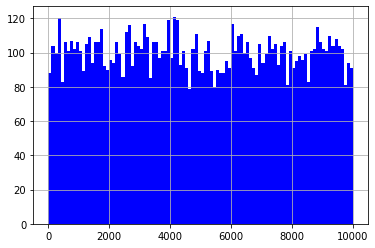

In [107]:
# Plot a histogram of the data.
# This confirms the data is not a normal distribution.
p =population['numbers'].hist(bins=100, color='blue')

View the true mean of the distribution

In [108]:
# View the mean of the numbers
population['numbers'].mean()

4970.621953859823

#### Questions

Explore several parameterizations of the sample mean using the function below. 

n = sample size  
nsamples = number of samples

In [109]:
import matplotlib.pyplot as plt

def sample_mean(population, sample_size=100, n_samples=100): 
    # Create a list
    sampled_means = []

    # For n_samples
    for i in range(0, n_samples):
        # Take a random sample from the population, 
        # take the mean of those rows, append to sampled_means
        sampled_means.append(population.sample(sample_size).mean().values[0])
    return sampled_means

[5940.372787720784, 5066.830837920222, 4453.391440850697, 3951.4624206499625, 4157.8415928338445, 4721.234331310074, 3673.4623739087933, 5820.922405472501, 3917.2633544356877, 3982.7496904889035]


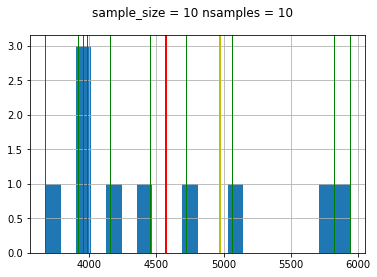

In [113]:
# Plot a histogram of sampled_means. 

sample_size=10
n_samples=10
sampled_means = sample_mean(population, sample_size, n_samples)
print(sampled_means)
pd.Series(sampled_means).hist(bins=20)
plt.suptitle("sample_size = " + str(sample_size) + " nsamples = " + str(n_samples));
for s in sampled_means:
    plt.axvline(x=s, linewidth=1, color='g')
plt.axvline(x=np.mean(sampled_means), linewidth=2, color='r')
plt.axvline(x=np.mean(population['numbers']), linewidth=2, color='y')
plt.show()

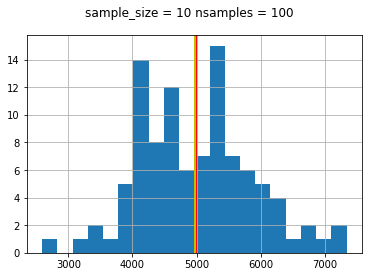

In [115]:
# Plot a histogram of sampled_means. 

sample_size=10
n_samples=100
sampled_means = sample_mean(population, sample_size, n_samples)
#print(sampled_means)
pd.Series(sampled_means).hist(bins=20)
plt.suptitle("sample_size = " + str(sample_size) + " nsamples = " + str(n_samples));
# for s in sampled_means:
#     plt.axvline(x=s, linewidth=1, color='g')
plt.axvline(x=np.mean(sampled_means), linewidth=2, color='r')
plt.axvline(x=np.mean(population['numbers']), linewidth=2, color='y')
plt.show()

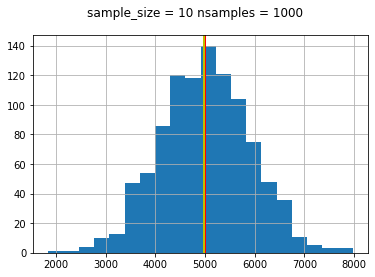

In [119]:
# Plot a histogram of sampled_means. 

sample_size=10
n_samples=1000
sampled_means = sample_mean(population, sample_size, n_samples)
#print(sampled_means)
pd.Series(sampled_means).hist(bins=20)
plt.suptitle("sample_size = " + str(sample_size) + " nsamples = " + str(n_samples));
# for s in sampled_means:
#     plt.axvline(x=s, linewidth=1, color='g')
plt.axvline(x=np.mean(sampled_means), linewidth=2, color='r')
plt.axvline(x=np.mean(population['numbers']), linewidth=2, color='y')
plt.show()

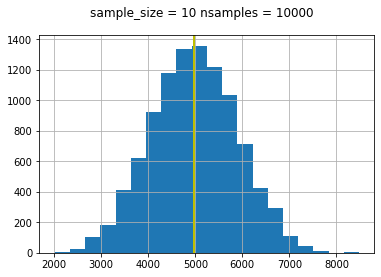

In [118]:
# Plot a histogram of sampled_means. 

sample_size=10
n_samples=10000
sampled_means = sample_mean(population, sample_size, n_samples)
#print(sampled_means)
pd.Series(sampled_means).hist(bins=20)
plt.suptitle("sample_size = " + str(sample_size) + " nsamples = " + str(n_samples));
# for s in sampled_means:
#     plt.axvline(x=s, linewidth=1, color='g')
plt.axvline(x=np.mean(sampled_means), linewidth=2, color='r')
plt.axvline(x=np.mean(population['numbers']), linewidth=2, color='y')
plt.show()

Notice how increasing the sample size and the number samples come closer to approximating a true normal distribution of the mean sample statistic.

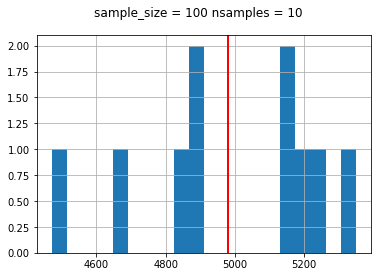

In [120]:
# Plot a histogram of sampled_means. 

sample_size=100
n_samples=10
sampled_means = sample_mean(population, sample_size, n_samples)
#print(sampled_means)
pd.Series(sampled_means).hist(bins=20)
plt.suptitle("sample_size = " + str(sample_size) + " nsamples = " + str(n_samples));
# for s in sampled_means:
#     plt.axvline(x=s, linewidth=1, color='g')
plt.axvline(x=np.mean(sampled_means), linewidth=2, color='r')
plt.show()

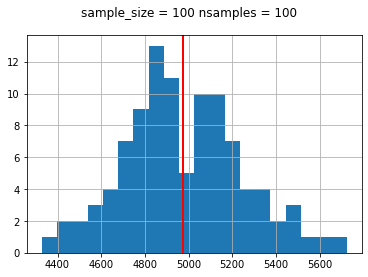

In [121]:
# Plot a histogram of sampled_means. 

sample_size=100
n_samples=100
sampled_means = sample_mean(population, sample_size, n_samples)
#print(sampled_means)
pd.Series(sampled_means).hist(bins=20)
plt.suptitle("sample_size = " + str(sample_size) + " nsamples = " + str(n_samples));
# for s in sampled_means:
#     plt.axvline(x=s, linewidth=1, color='g')
plt.axvline(x=np.mean(sampled_means), linewidth=2, color='r')
plt.show()

### Confidence interval

The confidence level represents the probability that an unknown parameter lies in the stated interval. 

- The level of confidence can be chosen by the investigator.  
- For example, we would like to estimate the confidence interval of the population mean from sample means.
- A confidence interval expresses our level of uncertainty, given a level of confidence:
    - Given the sample, there is a $95\%$ likelihood that the range x to y covers the true model accuracy.
    - The accuracy of the model was $x \pm y$ at the $95\%$ confidence level.

#### Confidence Interval Data Requirements

The confidence level describes the uncertainty associated with a sampling method. 

Suppose we used the same sampling method to select different samples and to compute a different interval estimate for each sample. Some interval estimates would include the true population parameter and some would not. 

A 90% confidence level means that we would expect 90% of the interval estimates to include the population parameter; a 95% confidence level means that 95% of the intervals would include the parameter; and so on.


To express a confidence interval, we need the following.

- Confidence level
- Statistic
- Margin of error


#### How to Construct a Confidence Interval

- Identify a sample statistic. E.g, sample mean, that you will use to estimate a population parameter.

- Select a confidence level. The confidence level describes the uncertainty of a sampling method. Often, researchers choose 90%, 95%, or 99% confidence levels. But any percentage can be used.

- Use the confidence level to [calculate](https://en.wikipedia.org/wiki/Confidence_interval) or lookup (see table below) the *critical value* $z^*$.

|C|z*|
|-|-|
|99%|2.576|
|98%|2.326|
|95%|1.96|
|90%|1.645|

- Find the margin of error. Often, you need to compute the margin of error, based on one of the following equations. Use the first equation if you know the true population standard deviation $\sigma$, otherwise use the other equation using the standard error $SE$.

> Margin of error = Critical value * Standard deviation of statistic
> 
> Margin of error = Critical value * Standard error of statistic
> 
> Standard error:
> $SE = \dfrac{\sigma}{\sqrt{n}}$

- Specify the confidence interval. The uncertainty is denoted by the confidence level. The range of the confidence interval is defined by the following equation.

Confidence interval = sample statistic $\pm$ Margin of error



#### Question

Confidence interval

Determine the confidence interval for the following problem. No python required.

We want to estimate the average weight of an adult male in Madison, WI. We draw a random sample of 1,000 men from a population of 1,000,000 men and weigh them. We find that the average man in our sample weighs 180 pounds, and the standard deviation of the sample is 30 pounds. What is the 95% confidence interval?

To specify the confidence interval, we work through the steps.

- Identify a sample statistic. Since we are trying to estimate the mean weight in the population, we choose the mean weight in our sample (180) as the sample statistic.

- Select a confidence level. In this case, the confidence level is defined for us in the problem. We are working with a 95% confidence level.

- Find the margin of error. Previously, we described how to compute the margin of error. The key steps are shown below.


        

Your work here:
    
Find standard error. The standard error (SE) of the mean is:

SE = s/sqrt(n) = 30 lbs / srt(1000) = .9486832 lbs

Compute margin of error (ME):

Margin = Critical Value * SE = 1.96 * .9486832 = 1.859419 lbs

Specify the confidence interval. The range of the confidence interval is defined by the sample statistic $\pm$ the margin of error: 

Confidence interval = 180 lbs +\- 1.86 lbs 

= 178.14 to 181.86 lbs

#### Optional: calculate critical value

The critical value is a factor used to compute the margin of error. 

To express the critical value as a t score (t*), follow these steps.

Compute alpha ($\alpha$):  
$\alpha = 1 - (\text{confidence level} / 100) = 0.05$

Find the critical probability (p*):  
$p* = 1 - \alpha/2 = 1 - 0.05/2 = 0.975$

Find the degrees of freedom (df):   
$df = n - 1 = 1000 - 1 = 999$

The critical value is the `t-statistic` having $999$ degrees of freedom and a cumulative probability equal to $0.975$. From a t Distribution Calculator or table we find that the critical value is $1.96$.



#### Question 

Calculate confidence interval for random distributions 

For the random `population` data set created above, use the `sampled_means()` function to generate sampled means for `sample_size=10` and `n_samples=10000`.

Calculate the margin of error:

`scipy.stats.t.interval(alpha, df, loc=0, scale=1)` - Endpoints of the range that contains alpha percent of the distribution

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html

and calculute the confidence interval.


In [122]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

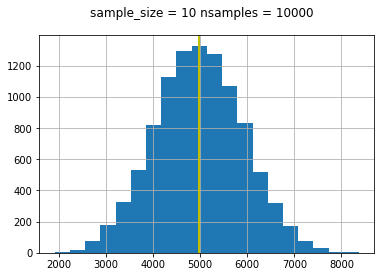

In [127]:
import numpy as np
import scipy.stats as st

# your work here
sample_size=10
n_samples=10000
sampled_means = sample_mean(population, sample_size, n_samples)
#print(sampled_means)
pd.Series(sampled_means).hist(bins=20)
plt.suptitle("sample_size = " + str(sample_size) + " nsamples = " + str(n_samples));
# for s in sampled_means:
#     plt.axvline(x=s, linewidth=1, color='g')
plt.axvline(x=np.mean(sampled_means), linewidth=2, color='r')
plt.axvline(x=np.mean(population['numbers']), linewidth=2, color='y')
plt.show()

a = sampled_means

In [128]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [129]:
mean_confidence_interval(a, confidence=0.95)

(4975.201918828634, 4956.965533522644, 4993.438304134624)

### Bootstrap  

The bootstrap is commonly used to estimate statistics when theory fails. 

Bootstrap can be used for estimating confidence bounds for convergence in the Monte Carlo integration.

https://en.wikipedia.org/wiki/Exponential_distribution

In [130]:
np.random.exponential?

For example, what is the 95% confidence interval for the mean of the following generated data set if you didn't know how it was generated?

In [149]:
x = np.concatenate([np.random.exponential(size=500), np.random.normal(size=400)])
x.shape

(900,)

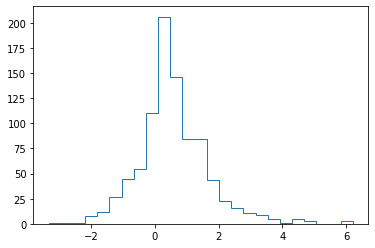

In [150]:
plt.hist(x, 25, histtype='step');

In [151]:
n = len(x)
reps = 100000
xb = np.random.choice(x, (n, reps))
mb = xb.mean(axis=0)
mb.sort()

np.percentile(mb, [2.5, 97.5])

array([0.516, 0.662])

### Experiment:

To get a better feel for bootstrap sampling:   
    
1) Modify `reps` in the cell above an observe how the quantify of bootstrap samples effects confidence intervals.

2) Modify the size of the original sample (~3 cells above) an observe the limits of bootstrap with respect to the underlying data.
